In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_excel('Swish inbetalningar.xlsx', header=1)

In [24]:
df.Belop.sum()

128740

In [11]:
df = df[df['Belop']<500].copy()
df['Belop'].sum()

14740

In [12]:
# städa data
df['antal'] = 0
df.loc[df['Belop']==10, 'Belop']=50
df.loc[df['Belop']==40, 'Belop']=50
df.loc[df['Belop']==80,'Belop']=100

In [13]:
# Innan 1 maj kostade det 50kr/besök, omvandla swish betalningar till antal besökare
df.loc[df['Datum']<'2024-05-01', 'antal'] = df.loc[df['Datum']<'2024-05-01', 'Belop']/50

In [14]:
# Efter 1 maj kostade det 100kr/besök, omvandla till antal besökarea
df.loc[(df['Datum']>='2024-05-01') & (df['Belop']==50), 'Belop'] = 100
df.loc[df['Datum']>='2024-05-01', 'antal'] = df.loc[df['Datum']>='2024-05-01', 'Belop']/100

In [15]:
data = df.set_index('Datum').groupby(pd.Grouper(freq='M'))['antal'].sum()
data

Datum
2024-01-31    13
2024-02-29     9
2024-03-31    25
2024-04-30    24
2024-05-31    19
2024-06-30     4
2024-07-31     1
2024-08-31     6
2024-09-30    20
2024-10-31    27
2024-11-30    25
2024-12-31    14
Freq: M, Name: antal, dtype: int64

# Totala antalet besökare:

In [16]:
df['antal'].sum()

187

In [17]:
months = 'jan feb mar apr maj jun jul aug sep okt nov dec'.split(' ')

In [43]:
len(months)

11

In [40]:
data.values

array([13,  9, 25, 24, 19,  4,  1,  6, 20, 27, 25, 14])

<BarContainer object of 12 artists>

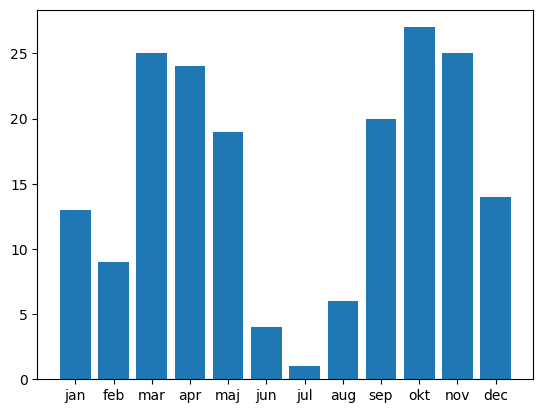

In [45]:
plt.bar(months, height=data.values)

In [25]:
4100/230

17.82608695652174